# ***Estimacion de una activo financiero***

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
import scipy.special
import yfinance as yf
from datetime import datetime, date

In [ ]:
df = pd.read_csv("GFNORTEO.MX (3).csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-16,120.290001,120.589996,118.750000,118.889999,99.459869,9674857
1,2017-10-17,118.889999,119.720001,115.620003,119.370003,99.861420,15446328
2,2017-10-18,119.370003,120.750000,117.620003,120.300003,100.639442,4659060
3,2017-10-19,119.620003,120.349998,118.809998,118.940002,99.501701,3601357
4,2017-10-20,119.650002,121.190002,118.209999,119.910004,100.313179,10144205


# Introducción

In [ ]:
for i in df.columns:
    print(f"In {i} there are {df[i].isna().sum()} na's")

In Date there are 0 na's
In Open there are 0 na's
In High there are 0 na's
In Low there are 0 na's
In Close there are 0 na's
In Adj Close there are 0 na's
In Volume there are 0 na's


In [ ]:
Close = df.Close
b = np.log (Close)
b = b.to_frame()
b.columns = ["Ln(Close)"]
b.tail()

,Ln(Close)
1252,4.948760
1253,4.944068
1254,4.965708
1255,4.978869
1256,4.987094


In [ ]:
lista_r = [np.nan]
for i in df.index:
    
    if i == 0:
        precio_anterior = df.loc[i,'Close']
    else:
        precio_actual = df.loc[i,'Close']

        rendimiento = np.log(precio_actual/precio_anterior)

        lista_r.append(rendimiento)

        precio_anterior = precio_actual

In [ ]:
df["Continous Perfomance"] = lista_r
df

,Date,Open,High,Low,Close,Adj Close,Volume,Continous Perfomance
0,2017-10-16,120.290001,120.589996,118.750000,118.889999,99.459869,9674857,NaN
1,2017-10-17,118.889999,119.720001,115.620003,119.370003,99.861420,15446328,0.004029
2,2017-10-18,119.370003,120.750000,117.620003,120.300003,100.639442,4659060,0.007761
3,2017-10-19,119.620003,120.349998,118.809998,118.940002,99.501701,3601357,-0.011369
4,2017-10-20,119.650002,121.190002,118.209999,119.910004,100.313179,10144205,0.008122
...,...,...,...,...,...,...,...,...
1252,2022-10-07,138.009995,141.490005,137.880005,141.000000,141.000000,6844605,0.019841
1253,2022-10-10,140.110001,141.910004,137.770004,140.339996,140.339996,2366055,-0.004692
1254,2022-10-11,140.440002,145.490005,138.809998,143.410004,143.410004,8793178,0.021640
1255,2022-10-12,143.410004,147.789993,141.990005,145.309998,145.309998,6650887,0.013162


In [ ]:
D = df.shape[0]

In [ ]:
D

1257

In [ ]:
t = df.at[252, "Close"]
h = 1/D
z = np.zeros(D)
x = np.zeros(D)
s = np.zeros(D)

In [ ]:
x

array([0., 0., 0., ..., 0., 0., 0.])

Text(0.5, 1.0, 'Histograma')

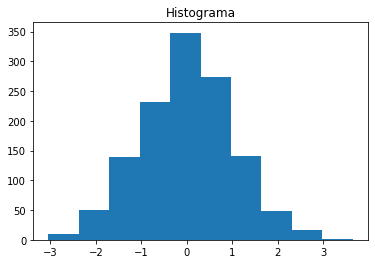

In [ ]:
for i in range(0,D):
  z[i] = random.gauss(0,1)

plt.hist(z, bins=10)
plt.title("Histograma")

In [ ]:
lista_t = [np.nan]
for i in df.index:
    
    if i == 0:
        precio_anterior = df.loc[i,'Close']
    else:
        precio_actual = df.loc[i,'Close']

        rendimiento = (precio_actual-precio_anterior)/precio_anterior

        lista_t.append(rendimiento)

        precio_anterior = precio_actual

In [ ]:
df["Performance"] = lista_t
df

,Date,Open,High,Low,Close,Adj Close,Volume,Continous Perfomance,Performance
0,2017-10-16,120.290001,120.589996,118.750000,118.889999,99.459869,9674857,NaN,NaN
1,2017-10-17,118.889999,119.720001,115.620003,119.370003,99.861420,15446328,0.004029,0.004037
2,2017-10-18,119.370003,120.750000,117.620003,120.300003,100.639442,4659060,0.007761,0.007791
3,2017-10-19,119.620003,120.349998,118.809998,118.940002,99.501701,3601357,-0.011369,-0.011305
4,2017-10-20,119.650002,121.190002,118.209999,119.910004,100.313179,10144205,0.008122,0.008155
...,...,...,...,...,...,...,...,...,...
1252,2022-10-07,138.009995,141.490005,137.880005,141.000000,141.000000,6844605,0.019841,0.020039
1253,2022-10-10,140.110001,141.910004,137.770004,140.339996,140.339996,2366055,-0.004692,-0.004681
1254,2022-10-11,140.440002,145.490005,138.809998,143.410004,143.410004,8793178,0.021640,0.021876
1255,2022-10-12,143.410004,147.789993,141.990005,145.309998,145.309998,6650887,0.013162,0.013249


In [ ]:
df["Performance"].head(5)

0         NaN
1    0.004037
2    0.007791
3   -0.011305
4    0.008155
Name: Performance, dtype: float64

In [ ]:
mean_price = df['Close'].mean()
mean_price
#this returns the mean of 313.6482938736204 USD. So, in 2020 the average price of SPY was 313.65 USD
#Now finding how many days SPY closed near the average price using Boolean 
df['boolean'] = df['Close'].between(313,314)
df['boolean'].value_counts()
#returns 
df[df['boolean'] == True]

,Date,Open,High,Low,Close,Adj Close,Volume,Continous Perfomance,Performance,boolean


In [ ]:
mean_price = df['Close'].mean()
mean_price

112.32323789419253

In [ ]:
df['Difference'] = df['Close'] - df['Close'].mean(axis=0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Continous Perfomance,Performance,boolean,Difference
0,2017-10-16,120.290001,120.589996,118.750000,118.889999,99.459869,9674857,NaN,NaN,False,6.566761
1,2017-10-17,118.889999,119.720001,115.620003,119.370003,99.861420,15446328,0.004029,0.004037,False,7.046765
2,2017-10-18,119.370003,120.750000,117.620003,120.300003,100.639442,4659060,0.007761,0.007791,False,7.976765
3,2017-10-19,119.620003,120.349998,118.809998,118.940002,99.501701,3601357,-0.011369,-0.011305,False,6.616764
4,2017-10-20,119.650002,121.190002,118.209999,119.910004,100.313179,10144205,0.008122,0.008155,False,7.586766


In [ ]:
df['Difference_Squared'] = df['Difference']**2
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Continous Perfomance,Performance,boolean,Difference,Difference_Squared
0,2017-10-16,120.290001,120.589996,118.750000,118.889999,99.459869,9674857,NaN,NaN,False,6.566761,43.122351
1,2017-10-17,118.889999,119.720001,115.620003,119.370003,99.861420,15446328,0.004029,0.004037,False,7.046765,49.656898
2,2017-10-18,119.370003,120.750000,117.620003,120.300003,100.639442,4659060,0.007761,0.007791,False,7.976765,63.628782
3,2017-10-19,119.620003,120.349998,118.809998,118.940002,99.501701,3601357,-0.011369,-0.011305,False,6.616764,43.781567
4,2017-10-20,119.650002,121.190002,118.209999,119.910004,100.313179,10144205,0.008122,0.008155,False,7.586766,57.559020


In [ ]:
sum = df['Difference_Squared'].sum() / len(df['Difference_Squared'])
sum

345.0594116265031

In [ ]:
std = np.sqrt(sum)
std

18.575774859383472

In [ ]:
standard_dev = (np.std(df['Close']))
standard_dev

18.575774859383472

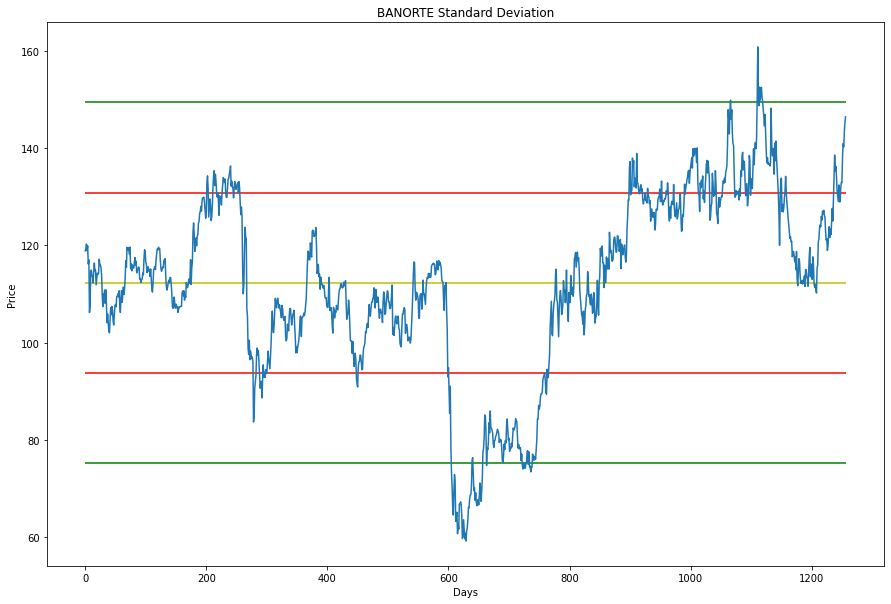

In [ ]:
prices = df['Close']
mean = df['Close'].mean()
std = (np.std(df['Close']))
min_value = min(prices)
max_value = max(prices)
plt.figure(figsize=(15,10))
plt.title("BANORTE Standard Deviation")
plt.xlabel('Days')
plt.ylabel('Price')

plt.plot(df.index, df['Close'])
plt.hlines(y=mean, xmin=0, xmax=len(prices), color = 'y')
plt.hlines(y=mean - std, xmin=0, xmax=len(prices), color='r')
plt.hlines(y=mean + std, xmin=0, xmax=len(prices), color='r')
plt.hlines(y=mean - 2*std, xmin=0, xmax=len(prices), color='g')
plt.hlines(y=mean + 2*std, xmin=0, xmax=len(prices), color='g')
plt.show()

In [ ]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Continous Perfomance,Performance,boolean,Difference,Difference_Squared
0,2017-10-16,120.290001,120.589996,118.750000,118.889999,99.459869,9674857,NaN,NaN,False,6.566761,43.122351
1,2017-10-17,118.889999,119.720001,115.620003,119.370003,99.861420,15446328,0.004029,0.004037,False,7.046765,49.656898
2,2017-10-18,119.370003,120.750000,117.620003,120.300003,100.639442,4659060,0.007761,0.007791,False,7.976765,63.628782
3,2017-10-19,119.620003,120.349998,118.809998,118.940002,99.501701,3601357,-0.011369,-0.011305,False,6.616764,43.781567
4,2017-10-20,119.650002,121.190002,118.209999,119.910004,100.313179,10144205,0.008122,0.008155,False,7.586766,57.559020


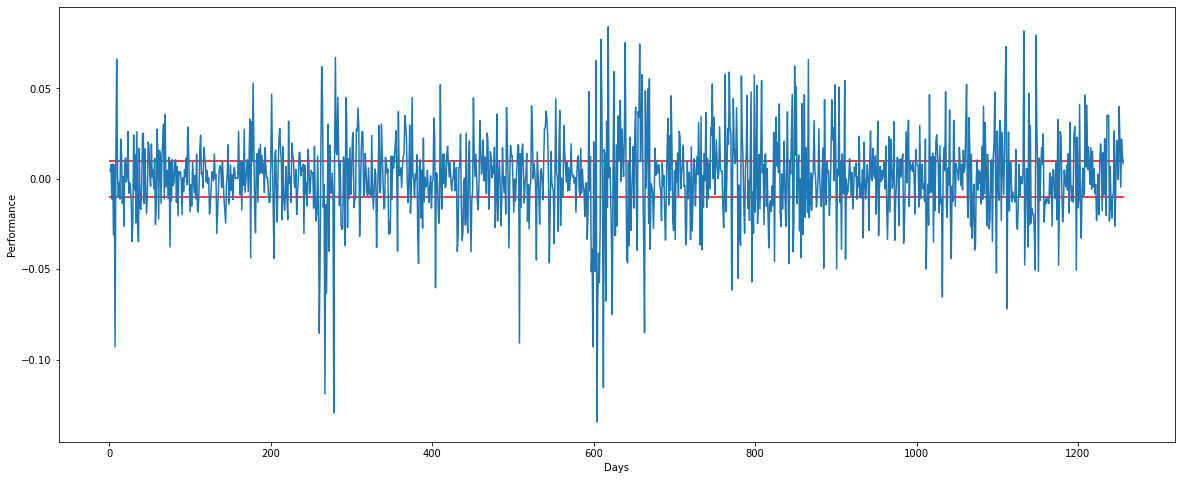

In [ ]:
plt.figure(figsize=(20,8))
plt.hlines(0.01, xmin=0, xmax=len(prices), color='r')
plt.hlines(-0.01 , xmin=0, xmax=len(prices), color='r')
plt.xlabel('Days')
plt.ylabel('Performance')
plt.scatter(df.index,df["Performance"])

# Año 2017

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
df_2017 = df.loc[(df['Date'].dt.year == 2017)]
df_2017.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Continous Perfomance,Performance,boolean,Difference,Difference_Squared
0,2017-10-16,120.290001,120.589996,118.750000,118.889999,99.459869,9674857,NaN,NaN,False,6.566761,43.122351
1,2017-10-17,118.889999,119.720001,115.620003,119.370003,99.861420,15446328,0.004029,0.004037,False,7.046765,49.656898
2,2017-10-18,119.370003,120.750000,117.620003,120.300003,100.639442,4659060,0.007761,0.007791,False,7.976765,63.628782
3,2017-10-19,119.620003,120.349998,118.809998,118.940002,99.501701,3601357,-0.011369,-0.011305,False,6.616764,43.781567
4,2017-10-20,119.650002,121.190002,118.209999,119.910004,100.313179,10144205,0.008122,0.008155,False,7.586766,57.559020


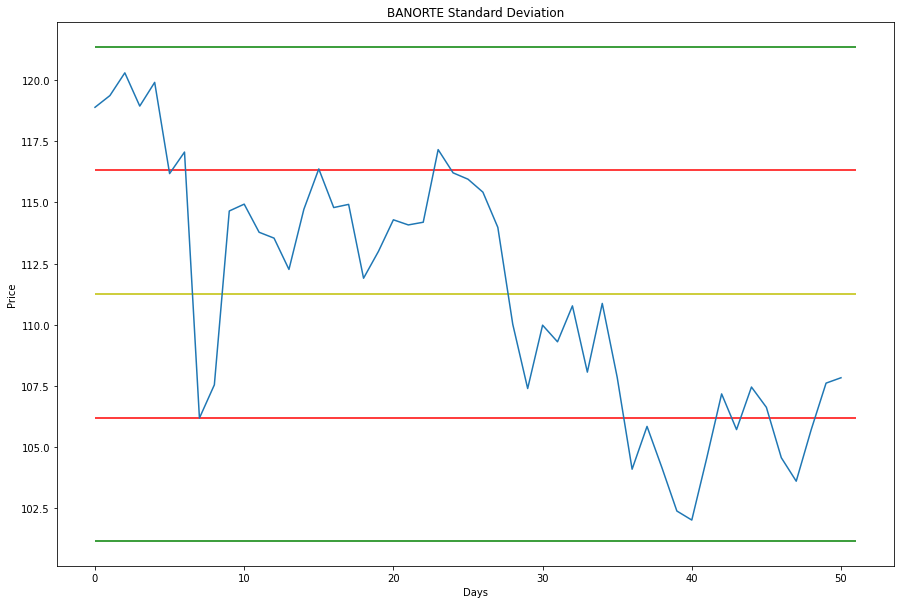

In [ ]:
prices = df_2017['Close']
mean = df_2017['Close'].mean()
std = (np.std(df_2017['Close']))
min_value = min(prices)
max_value = max(prices)
plt.figure(figsize=(15,10))
plt.title("BANORTE Standard Deviation")
plt.xlabel('Days')
plt.ylabel('Price')

plt.plot(df_2017.index, df_2017['Close'])
plt.hlines(y=mean, xmin=0, xmax=len(prices), color = 'y')
plt.hlines(y=mean - std, xmin=0, xmax=len(prices), color='r')
plt.hlines(y=mean + std, xmin=0, xmax=len(prices), color='r')
plt.hlines(y=mean - 2*std, xmin=0, xmax=len(prices), color='g')
plt.hlines(y=mean + 2*std, xmin=0, xmax=len(prices), color='g')
plt.show()

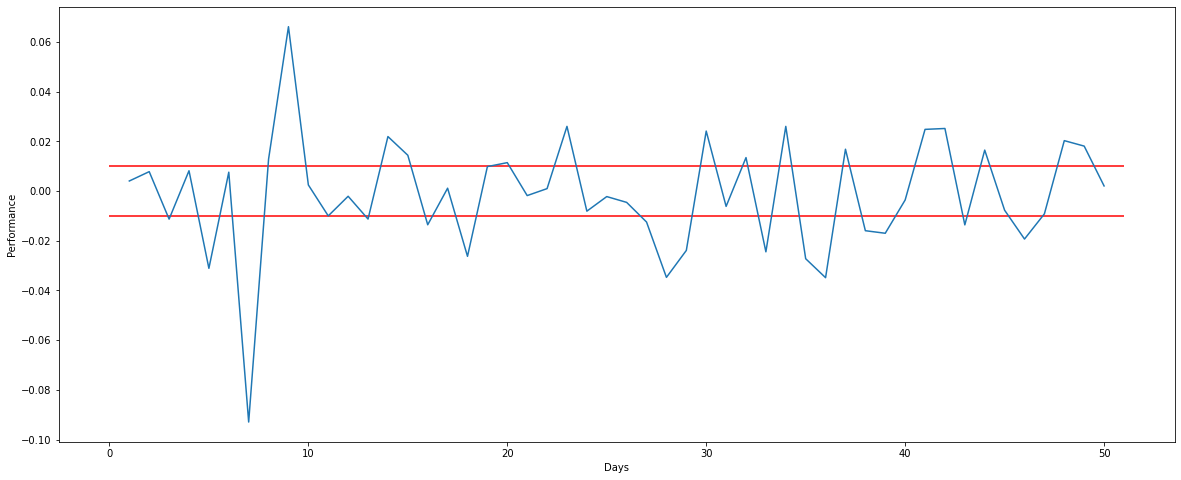

In [ ]:
plt.figure(figsize=(20,8))
plt.hlines(0.01, xmin=0, xmax=len(prices), color='r')
plt.hlines(-0.01 , xmin=0, xmax=len(prices), color='r')
plt.xlabel('Days')
plt.ylabel('Performance')
plt.plot(df_2017.index,df_2017["Performance"])

# Año 2018

In [ ]:
df_2018 = df.loc[(df['Date'].dt.year == 2018)]
df_2018.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Continous Perfomance,Performance,boolean,Difference,Difference_Squared
51,2018-01-02,108.000000,108.300003,106.889999,107.370003,89.822578,4626737,-0.004275,-0.004266,False,-4.953235,24.534536
52,2018-01-03,107.110001,109.769997,107.000000,109.430000,91.545914,4327398,0.019004,0.019186,False,-2.893238,8.370826
53,2018-01-04,108.900002,110.589996,108.900002,109.519997,91.621201,5296469,0.000822,0.000822,False,-2.803241,7.858160
54,2018-01-05,109.790001,111.720001,108.720001,110.040001,92.056206,5512784,0.004737,0.004748,False,-2.283237,5.213171
55,2018-01-08,109.209999,112.209999,108.900002,109.419998,91.537544,3969470,-0.005650,-0.005634,False,-2.903240,8.428802


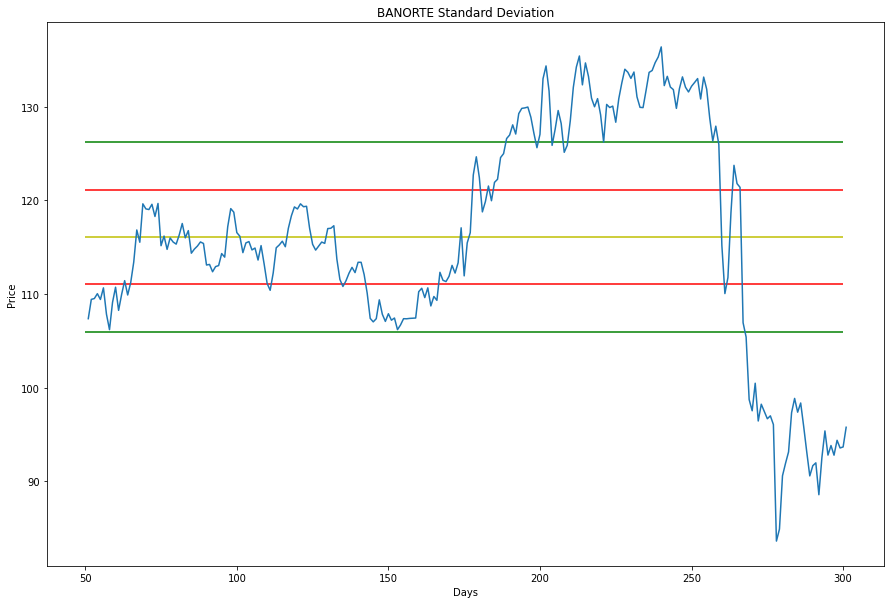

In [ ]:
prices = df_2018['Close']
mean = df_2018['Close'].mean()
std = (np.std(df_2017['Close']))
min_value = min(prices)
max_value = max(prices)
plt.figure(figsize=(15,10))
plt.title("BANORTE Standard Deviation")
plt.xlabel('Days')
plt.ylabel('Price')

plt.plot(df_2018.index, df_2018['Close'])
plt.hlines(y=mean, xmin=50, xmax=300, color = 'y')
plt.hlines(y=mean - std, xmin=50, xmax=300, color='r')
plt.hlines(y=mean + std, xmin=50, xmax=300, color='r')
plt.hlines(y=mean - 2*std, xmin=50, xmax=300, color='g')
plt.hlines(y=mean + 2*std, xmin=50, xmax=300, color='g')
plt.show()

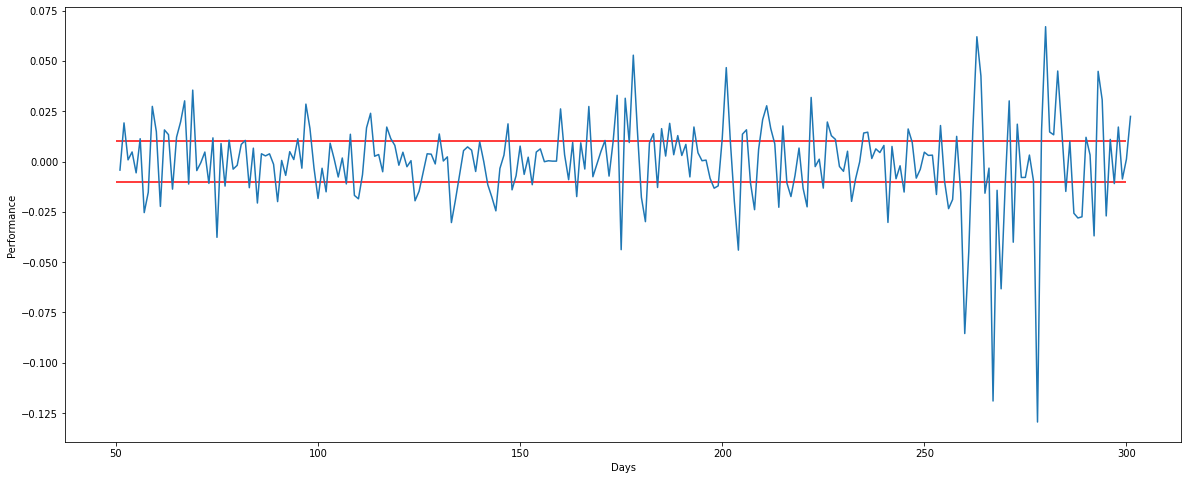

In [ ]:
plt.figure(figsize=(20,8))
plt.hlines(0.01, xmin=50, xmax=300, color='r')
plt.hlines(-0.01 , xmin=50, xmax=300, color='r')
plt.xlabel('Days')
plt.ylabel('Performance')
plt.plot(df_2018.index,df_2018["Performance"])

# Año 2019

In [ ]:
df_2019 = df.loc[(df['Date'].dt.year == 2019)]
df_2019.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Continous Perfomance,Performance,boolean,Difference,Difference_Squared
548,2019-12-24,110.559998,110.559998,109.900002,110.199997,100.439850,199186,-0.001451,-0.001450,False,-2.123241,4.508152
549,2019-12-26,110.199997,110.250000,109.019997,109.629997,99.920334,1578209,-0.005186,-0.005172,False,-2.693241,7.253547
550,2019-12-27,109.980003,110.070000,108.519997,108.919998,99.273216,3020807,-0.006497,-0.006476,False,-3.403240,11.582042
551,2019-12-30,109.690002,109.690002,103.510002,105.000000,95.700401,2621763,-0.036653,-0.035990,False,-7.323238,53.629813
552,2019-12-31,105.000000,105.000000,105.000000,105.000000,95.700401,0,0.000000,0.000000,False,-7.323238,53.629813


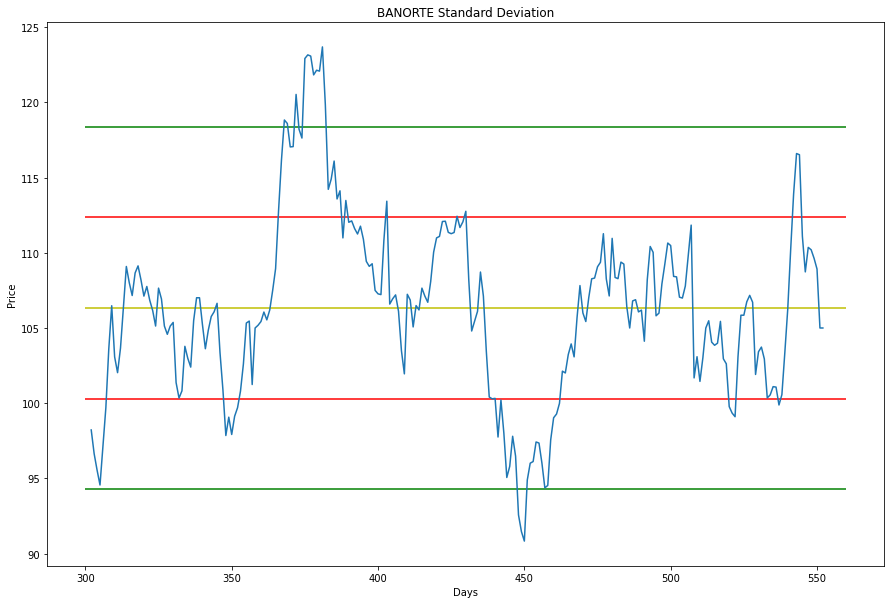

In [ ]:
prices = df_2019['Close']
mean = df_2019['Close'].mean()
std = (np.std(df_2019['Close']))
min_value = min(prices)
max_value = max(prices)
plt.figure(figsize=(15,10))
plt.title("BANORTE Standard Deviation")
plt.xlabel('Days')
plt.ylabel('Price')

plt.plot(df_2019.index, df_2019['Close'])
plt.hlines(y=mean, xmin=300, xmax=560, color = 'y')
plt.hlines(y=mean - std, xmin=300, xmax=560, color='r')
plt.hlines(y=mean + std, xmin=300, xmax=560, color='r')
plt.hlines(y=mean - 2*std, xmin=300, xmax=560, color='g')
plt.hlines(y=mean + 2*std, xmin=300, xmax=560, color='g')
plt.show()

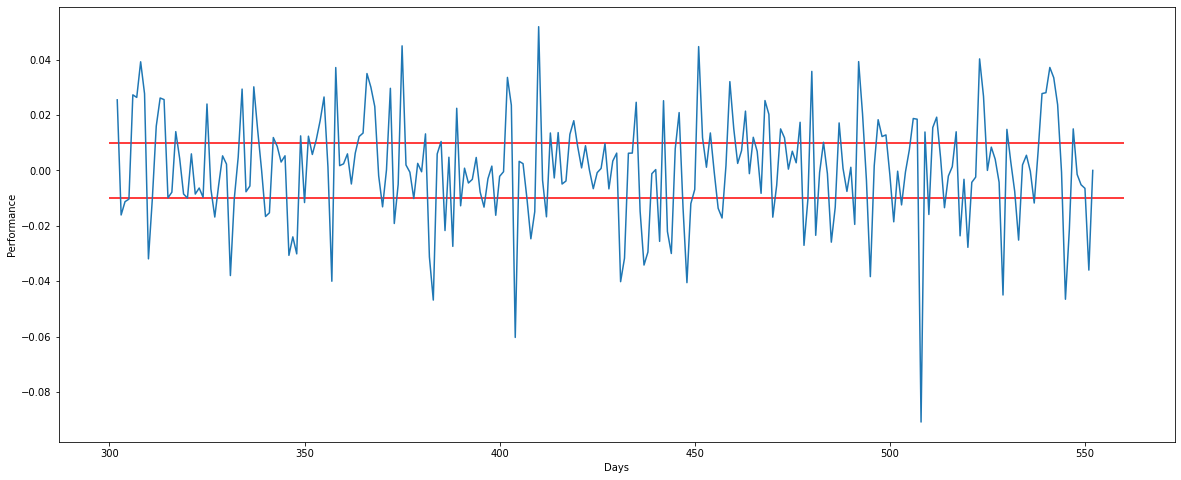

In [ ]:
plt.figure(figsize=(20,8))
plt.hlines(0.01, xmin=300, xmax=560, color='r')
plt.hlines(-0.01, xmin=300, xmax=560, color='r')
plt.xlabel('Days')
plt.ylabel('Performance')
plt.plot(df_2019.index,df_2019["Performance"])

# Black Scholes

In [ ]:
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
from pandas import DataFrame

def d1(S,K,T,r,sigma):
    return(log(S/K)+(r+sigma**2/2.)*T)/(sigma*sqrt(T))
def d2(S,K,T,r,sigma):
    return d1(S,K,T,r,sigma)-sigma*sqrt(T)

In [ ]:
import numpy as np
from scipy.stats import norm

N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T)* N(d2)

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0.5, 1.0, 'AAPL Rolling Volatility')

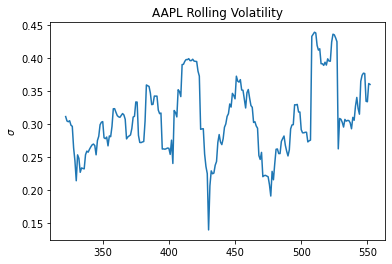

In [ ]:
import datetime as dt
start = dt.datetime(2019,1,2)    
end = dt.datetime(2020,12,31) 
df_2019['change'] = df_2019['Adj Close'].pct_change()
df_2019['rolling_sigma'] = df_2019['change'].rolling(20).std() * np.sqrt(255)


df_2019.rolling_sigma.plot()
plt.ylabel('$\sigma$')
plt.title('AAPL Rolling Volatility')

In [ ]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=1000):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def stock_price(
                    self,
                    s0=10000,
                    mu=0.2,
                    sigma=0.5,
                    deltaT=100,
                    dt=0.01
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.gen_normal(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

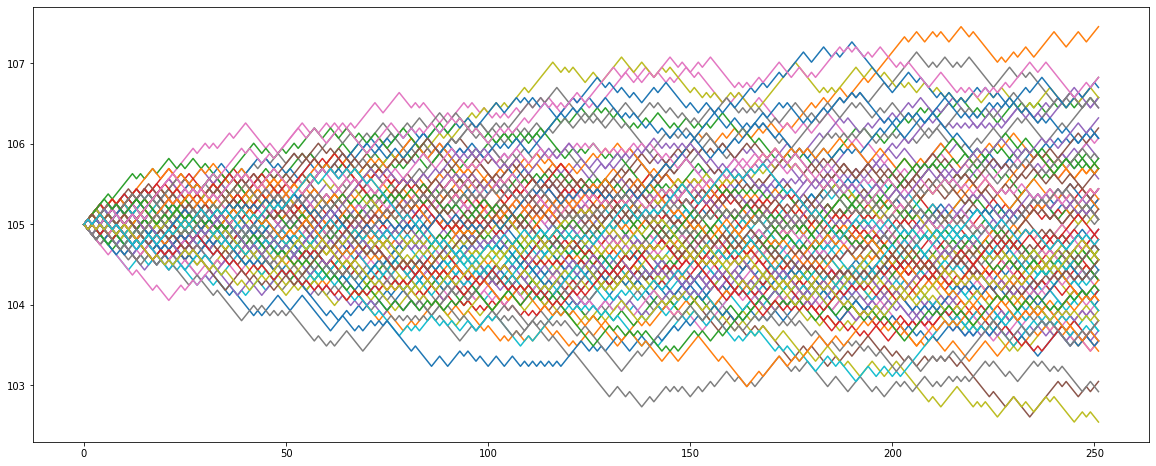

In [ ]:
plt.figure(figsize=(20,8))
b = Brownian(105)
for i in range(100):
    f=b.gen_random_walk(252)
    plt.plot(b.gen_random_walk(252))
plt.show()

In [ ]:
def plot_stock_price(mu,sigma):
    """
    Plots stock price for multiple scenarios
    """
    plt.figure(figsize=(9,4))
    for i in range(5):
        plt.plot(b.stock_price(mu=mu,
                               sigma=sigma,
                               dt=0.1))
    plt.legend(['Scenario-'+str(i) for i in range(1,6)],
               loc='upper left')
    plt.hlines(y=100,xmin=0,xmax=520,
               linestyle='--',color='k')
    plt.show()

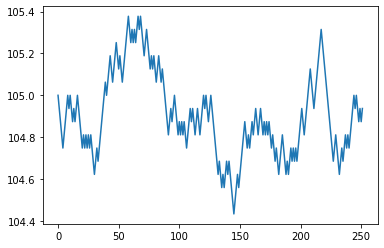

In [ ]:
plt.plot(f)

In [ ]:
df_202X = df.loc[(df['Date'].dt.year == 2020)]
df_202X.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Continous Perfomance,Performance,boolean,Difference,Difference_Squared
553,2020-01-02,106.389999,109.989998,106.330002,109.660004,99.947685,1980815,0.043424,0.044381,False,-2.663234,7.092815
554,2020-01-03,109.010002,111.080002,108.610001,109.959999,100.221107,2689637,0.002732,0.002736,False,-2.363239,5.584898
555,2020-01-06,109.309998,110.220001,108.610001,110.080002,100.330482,3199855,0.001091,0.001091,False,-2.243236,5.032107
556,2020-01-07,110.150002,110.389999,106.510002,106.879997,97.413895,3763805,-0.029501,-0.029070,False,-5.443241,29.628871
557,2020-01-08,106.870003,109.500000,106.760002,108.779999,99.145615,5920884,0.017621,0.017777,False,-3.543239,12.554542


In [ ]:
df_202X.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Continous Perfomance,Performance,boolean,Difference,Difference_Squared
800,2020-12-24,110.949997,110.970001,108.120003,108.279999,98.689903,1952989,-0.018665,-0.018492,False,-4.043239,16.347781
801,2020-12-28,108.830002,109.290001,107.599998,108.230003,98.644333,2170901,-0.000462,-0.000462,False,-4.093235,16.754572
802,2020-12-29,108.089996,114.239998,108.089996,113.820000,103.739235,4791193,0.050360,0.051649,False,1.496762,2.240297
803,2020-12-30,114.290001,114.989998,110.489998,110.989998,101.159882,4411414,-0.025178,-0.024864,False,-1.333240,1.777529
804,2020-12-31,110.809998,111.379997,109.629997,109.930000,100.193764,1411255,-0.009596,-0.009550,False,-2.393238,5.727588


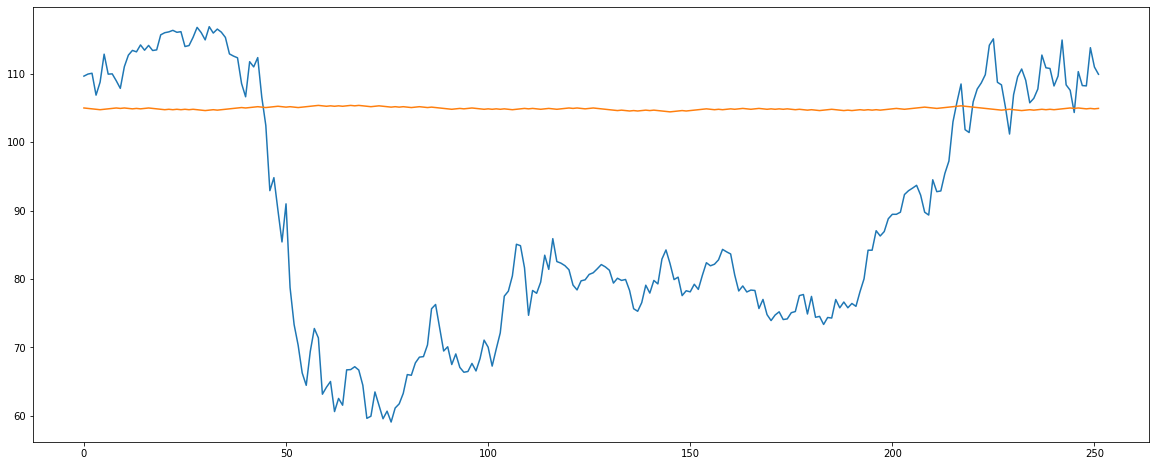

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df_202X.reset_index(drop=True).index, df_202X['Close'])
plt.plot(df_202X.reset_index(drop=True).index, f)
plt.show()